# Subreddit analysis

In [5]:
import pandas as pd

from scraping import get_all_comments_from_subreddit

## Getting the data

In [6]:
subreddit_url = "/r/askreddit" # https://reddit.com/r/askreddit
comments = get_all_comments_from_subreddit(subreddit_url)

Getting posts from /r/askreddit...
Getting comments from https://reddit.com/r/AskReddit/comments/c0qaj7/have_you_ever_quit_a_job_without_another_lined_up/.json...
Getting comments from https://reddit.com/r/AskReddit/comments/c0ocp5/it_people_of_reddit_what_is_your_goto_generic/.json...
Getting comments from https://reddit.com/r/AskReddit/comments/c0matc/which_two_and_two_did_you_just_recently_put/.json...
Getting comments from https://reddit.com/r/AskReddit/comments/c0kwdw/teachers_of_reddit_what_is_the_weirdest_excuse/.json...
Getting comments from https://reddit.com/r/AskReddit/comments/c0kyo0/americans_whove_visited_european_countries_what/.json...
Getting comments from https://reddit.com/r/AskReddit/comments/c0liuk/liberals_of_reddit_what_is_your_most_conservative/.json...
Getting comments from https://reddit.com/r/AskReddit/comments/c0n5pd/its_a_post_apocalyptic_world_however_reddit_is/.json...
Getting comments from https://reddit.com/r/AskReddit/comments/c0ovb8/serious_doctor_of_

## Pre-pre-process data

Getting that sweet dataframe tho

In [7]:
df = pd.DataFrame(comments)
df.head()

,content,score
0,Worked a call center job after one week of tra...,10411
1,"Yep.\n\nMy mental health is still not good, an...",12314
2,Left my job of 15 years with nothing lined up ...,7817
3,I got bored of my life in the UK and sick of m...,4803
4,Hell yes. I worked in a retail store that was...,17320


Sorting that shit by scoring (higher better, faster stronger?)

In [8]:
df.sort_values(by=['score'], inplace=True, ascending=False)
df.head()

,content,score
98,Valve released Steam. \n\nTook me entirely too...,35603
78,"In Spanish, hats are called ""sombrero"" because...",27411
550,A sugar glider. Kept hearing a high pitched sq...,27299
1203,Fyre Festival VIP suites,24694
81,I race cars in an amateur league. There is a b...,23405


Let's remove all urls from the text with a `re.sub` regex I found in the internet.

In [9]:
import re

hola = "https://reddit.com/ejemplo hola me llamo Javier"
print(re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', hola))
print(hola)

df['content'] = df['content'].apply(lambda comment: re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', comment))
df.head()

 hola me llamo Javier
https://reddit.com/ejemplo hola me llamo Javier


,content,score
98,Valve released Steam. \n\nTook me entirely too...,35603
78,"In Spanish, hats are called ""sombrero"" because...",27411
550,A sugar glider. Kept hearing a high pitched sq...,27299
1203,Fyre Festival VIP suites,24694
81,I race cars in an amateur league. There is a b...,23405


Remove all punctuation with this expression I found in the internet.

In [10]:
df['content'] = df['content'].str.replace(r'[^\w\s]','')
df.head()

,content,score
98,Valve released Steam \n\nTook me entirely too ...,35603
78,In Spanish hats are called sombrero because th...,27411
550,A sugar glider Kept hearing a high pitched squ...,27299
1203,Fyre Festival VIP suites,24694
81,I race cars in an amateur league There is a bl...,23405


## Pre-processing stats!

Let's do some Natural Language Processing with `NLTK`!

In [11]:
import nltk
#nltk.download()

Okay, let's turn all text into a list of words! We are going to use nltk instead of our own homegrown solution! They know better!

In [12]:
df['content'] = df['content'].apply(lambda comment: nltk.word_tokenize(comment))
df.head()

,content,score
98,"[Valve, released, Steam, Took, me, entirely, t...",35603
78,"[In, Spanish, hats, are, called, sombrero, bec...",27411
550,"[A, sugar, glider, Kept, hearing, a, high, pit...",27299
1203,"[Fyre, Festival, VIP, suites]",24694
81,"[I, race, cars, in, an, amateur, league, There...",23405


The word count of each comment could be useful

In [13]:
df['word_count'] = df['content'].apply(len)
df.head()

,content,score,word_count
98,"[Valve, released, Steam, Took, me, entirely, t...",35603,12
78,"[In, Spanish, hats, are, called, sombrero, bec...",27411,11
550,"[A, sugar, glider, Kept, hearing, a, high, pit...",27299,29
1203,"[Fyre, Festival, VIP, suites]",24694,4
81,"[I, race, cars, in, an, amateur, league, There...",23405,39


Then, the lenght of the characters could be of use too

In [14]:
df['char_len'] = df['content'].apply(lambda comment: sum(len(word) for word in comment))
df.head()

,content,score,word_count,char_len
98,"[Valve, released, Steam, Took, me, entirely, t...",35603,12,54
78,"[In, Spanish, hats, are, called, sombrero, bec...",27411,11,56
550,"[A, sugar, glider, Kept, hearing, a, high, pit...",27299,29,119
1203,"[Fyre, Festival, VIP, suites]",24694,4,21
81,"[I, race, cars, in, an, amateur, league, There...",23405,39,159


How many characters long is a word in average?

In [15]:
def avg_word(comment):
    return (sum(len(word) for word in comment)/len(comment))
df['avg_word'] = df['content'].apply(avg_word)
df.head()

,content,score,word_count,char_len,avg_word
98,"[Valve, released, Steam, Took, me, entirely, t...",35603,12,54,4.500000
78,"[In, Spanish, hats, are, called, sombrero, bec...",27411,11,56,5.090909
550,"[A, sugar, glider, Kept, hearing, a, high, pit...",27299,29,119,4.103448
1203,"[Fyre, Festival, VIP, suites]",24694,4,21,5.250000
81,"[I, race, cars, in, an, amateur, league, There...",23405,39,159,4.076923


Let's get how many stopwords are there in the comments

In [16]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['stopwords'] = df['content'].apply(lambda comment: len([word for word in comment if word in stop]))
df.head()

,content,score,word_count,char_len,avg_word,stopwords
98,"[Valve, released, Steam, Took, me, entirely, t...",35603,12,54,4.500000,4
78,"[In, Spanish, hats, are, called, sombrero, bec...",27411,11,56,5.090909,3
550,"[A, sugar, glider, Kept, hearing, a, high, pit...",27299,29,119,4.103448,12
1203,"[Fyre, Festival, VIP, suites]",24694,4,21,5.250000,0
81,"[I, race, cars, in, an, amateur, league, There...",23405,39,159,4.076923,17


How many upper words?

In [17]:
df['upper_words'] = df['content'].apply(lambda comment: len([word for word in comment if word.isupper()]))
df.head()

,content,score,word_count,char_len,avg_word,stopwords,upper_words
98,"[Valve, released, Steam, Took, me, entirely, t...",35603,12,54,4.500000,4,0
78,"[In, Spanish, hats, are, called, sombrero, bec...",27411,11,56,5.090909,3,0
550,"[A, sugar, glider, Kept, hearing, a, high, pit...",27299,29,119,4.103448,12,1
1203,"[Fyre, Festival, VIP, suites]",24694,4,21,5.250000,0,1
81,"[I, race, cars, in, an, amateur, league, There...",23405,39,159,4.076923,17,3


## Actually pre-processing

Let's turn all words into lowercase

In [18]:
df['content'] = df['content'].apply(lambda comment: [word.lower() for word in comment])
df.head()

,content,score,word_count,char_len,avg_word,stopwords,upper_words
98,"[valve, released, steam, took, me, entirely, t...",35603,12,54,4.500000,4,0
78,"[in, spanish, hats, are, called, sombrero, bec...",27411,11,56,5.090909,3,0
550,"[a, sugar, glider, kept, hearing, a, high, pit...",27299,29,119,4.103448,12,1
1203,"[fyre, festival, vip, suites]",24694,4,21,5.250000,0,1
81,"[i, race, cars, in, an, amateur, league, there...",23405,39,159,4.076923,17,3


We don't want none of those pesky stopwords, do we?

In [19]:
df['content'] = df['content'].apply(lambda comment: [word for word in comment if word not in stop])
df.head()

,content,score,word_count,char_len,avg_word,stopwords,upper_words
98,"[valve, released, steam, took, entirely, long,...",35603,12,54,4.500000,4,0
78,"[spanish, hats, called, sombrero, make, sombra...",27411,11,56,5.090909,3,0
550,"[sugar, glider, kept, hearing, high, pitched, ...",27299,29,119,4.103448,12,1
1203,"[fyre, festival, vip, suites]",24694,4,21,5.250000,0,1
81,"[race, cars, amateur, league, blue, 240sx, nam...",23405,39,159,4.076923,17,3


Most common words don't really help in our studies. Let's remove those!

In [20]:
freq = pd.Series(' '.join(" ".join(comment) for comment in df['content']).split(" ")).value_counts()[:10]
freq

im        335
one       292
like      273
would     266
time      226
school    218
got       203
get       200
didnt     187
back      184
dtype: int64

In [34]:
for word in df['content']:
    if word not in freq_list:
        print(word)
    else:
        pass

['valve', 'released', 'steam', 'took', 'entirely', 'long', 'realize', 'pun']
['spanish', 'hats', 'called', 'sombrero', 'make', 'sombra', 'shade']
['sugar', 'glider', 'kept', 'hearing', 'high', 'pitched', 'squeek', 'class', 'noticed', 'small', 'animal', 'jacket', 'pocket', 'decided', 'poke', 'head']
['fyre', 'festival', 'vip', 'suites']
['race', 'cars', 'amateur', 'league', 'blue', '240sx', 'name', 'blue', 'bayou', 'always', 'thought', 'louisiana', 'something', 'day', 'realized', 'sounds', 'like', 'blew']
['friends', 'didnt', 'know', 'tinder', 'pun', 'swipe', 'match', 'edit', 'users', 'tinder', 'match', 'light', 'fire']
['little', 'orange', 'lizard', 'box', 'charizard', 'pokémon', 'card', 'taped', 'edit', 'clarify', 'card', 'taped', 'box', 'edit', 'wow', 'blew', 'understand', 'meaning', 'inbox', 'spammed']
['cul', 'de', 'sac', 'means', 'bottom', 'bag', 'way', 'came', 'first', 'language', 'french']
['vitamin', 'b12', 'vape', 'pen', 'didnt', 'know', 'existed']
['homemade', 'arrow', 'made'

In [26]:
df['content'].apply(lambda comment: [word for word in comment if word not in freq_list])


98      [valve, released, steam, took, entirely, long,...
78      [spanish, hats, called, sombrero, make, sombra...
550     [sugar, glider, kept, hearing, high, pitched, ...
1203                        [fyre, festival, vip, suites]
81      [race, cars, amateur, league, blue, 240sx, nam...
87      [friends, know, tinder, pun, swipe, match, edi...
560     [little, orange, lizard, box, charizard, pokém...
80      [cul, de, sac, means, bottom, bag, way, came, ...
544              [vitamin, b12, vape, pen, know, existed]
548     [homemade, arrow, made, pencil, modified, razo...
1212    [putting, high, interest, savings, account, au...
1234    [help, nigerian, prince, relative, reap, rewar...
1205    [joining, church, scientology, getting, thetan...
1204       [micro, transactions, freemium, mobile, games]
1210         [spending, lottery, winning, 50, bucks, lol]
84      [sonic, hedgehogs, best, friend, named, miles,...
4       [hell, yes, worked, retail, store, farmingbase...
557     [fathe

In [17]:
freq_list = list(freq.index)
df['content'] = df['content'].apply(lambda comment: [word for word in comment if word not in freq_list])
df.head()

,content,score,word_count,char_len,avg_word,stopwords,upper_words
99,"[valve, released, steam, took, entirely, long,...",34877,12,54,4.500000,4,0
574,"[sugar, glider, kept, hearing, high, pitched, ...",27255,29,119,4.103448,12,1
76,"[spanish, hats, called, sombrero, make, sombra...",26751,11,56,5.090909,3,0
1051,"[fyre, festival, vip, suites]",24645,4,21,5.250000,0,1
78,"[race, cars, amateur, league, blue, 240sx, nam...",22941,39,159,4.076923,17,3


So the same happens with the least frequent ones. Let's remove those too.

In [18]:
less_freq = pd.Series(' '.join(" ".join(comment) for comment in df['content']).split(" ")).value_counts()[-10:]
less_freq

ａｃｔｉｖａｔｅｄ       1
scratched       1
alternate       1
expunging       1
notified        1
sensitivity     1
phrasing        1
transformed     1
continuously    1
samuel          1
dtype: int64

In [19]:
less_freq_list = list(less_freq.index)
df['content'] = df['content'].apply(lambda comment: [word for word in comment if word not in less_freq_list])
df.head()

,content,score,word_count,char_len,avg_word,stopwords,upper_words
99,"[valve, released, steam, took, entirely, long,...",34877,12,54,4.500000,4,0
574,"[sugar, glider, kept, hearing, high, pitched, ...",27255,29,119,4.103448,12,1
76,"[spanish, hats, called, sombrero, make, sombra...",26751,11,56,5.090909,3,0
1051,"[fyre, festival, vip, suites]",24645,4,21,5.250000,0,1
78,"[race, cars, amateur, league, blue, 240sx, nam...",22941,39,159,4.076923,17,3


Now that we are with less words, let's correct those we have. In the internet, half the people write like shit believe or not!

This usually takes a while, don't panic.

In [20]:
#from textblob import TextBlob
#print(TextBlob(" ".join("Hey what are you doing?".split())).correct())
#df['content'] = df['content'].apply(lambda comment: TextBlob(" ".join(comment)).correct())
#df.head()

Now, we will turn all the words into their lemmas.
See, you can have `tree` and `trees` or `go` and `going`, and this will turn it into `tree` and `go`.

This should take a while.

In [21]:
from textblob import Word
df['content'] = df['content'].apply(lambda comment: [Word(word).lemmatize() for word in comment])
df.head()

,content,score,word_count,char_len,avg_word,stopwords,upper_words
99,"[valve, released, steam, took, entirely, long,...",34877,12,54,4.500000,4,0
574,"[sugar, glider, kept, hearing, high, pitched, ...",27255,29,119,4.103448,12,1
76,"[spanish, hat, called, sombrero, make, sombra,...",26751,11,56,5.090909,3,0
1051,"[fyre, festival, vip, suite]",24645,4,21,5.250000,0,1
78,"[race, car, amateur, league, blue, 240sx, name...",22941,39,159,4.076923,17,3


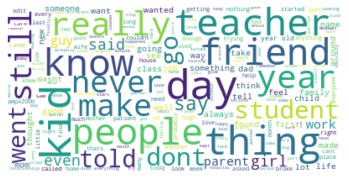

In [28]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

wordcloud = WordCloud(max_font_size=50, background_color="white").generate(" ".join(" ".join(comment) for comment in df['content']))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()